In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cash_request=pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
fees=pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

In [3]:
# Copia del DataFrame original para evitar modificaciones no deseadas
cr = cash_request.copy()
cr=cr[["amount","created_at","user_id","deleted_account_id"]]
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   amount              23970 non-null  float64
 1   created_at          23970 non-null  object 
 2   user_id             21867 non-null  float64
 3   deleted_account_id  2104 non-null   float64
dtypes: float64(3), object(1)
memory usage: 749.2+ KB


In [4]:
# Rellenar los valores nulos en la columna 'user_id' con los valores de la columna 'deleted_account_id'
cr.fillna({"user_id": cr["deleted_account_id"]}, inplace=True)
cr.drop(columns=["deleted_account_id"], inplace=True)
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   amount      23970 non-null  float64
 1   created_at  23970 non-null  object 
 2   user_id     23970 non-null  float64
dtypes: float64(2), object(1)
memory usage: 561.9+ KB


In [5]:
# Convertir las fechas de interés a tipo datetime para facilitar su manipulación
cr['created_at'] = pd.to_datetime(cr['created_at'])
cr.head()

,amount,created_at,user_id
0,100.0,2019-12-10 19:05:21.596873+00:00,804.0
1,100.0,2019-12-10 19:50:12.347780+00:00,231.0
2,100.0,2019-12-10 19:13:35.825460+00:00,191.0
3,99.0,2019-12-10 19:16:10.880172+00:00,761.0
4,100.0,2020-05-06 09:59:38.877376+00:00,7686.0


In [6]:
# Crear una columna 'Mes' que represente el mes de la solicitud de adelanto en efectivo de cada cliente
cr['Mes'] = cr['created_at'].dt.to_period('M')
cr.head()

/tmp/ipykernel_46799/4058608649.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cr['Mes'] = cr['created_at'].dt.to_period('M')


,amount,created_at,user_id,Mes
0,100.0,2019-12-10 19:05:21.596873+00:00,804.0,2019-12
1,100.0,2019-12-10 19:50:12.347780+00:00,231.0,2019-12
2,100.0,2019-12-10 19:13:35.825460+00:00,191.0,2019-12
3,99.0,2019-12-10 19:16:10.880172+00:00,761.0,2019-12
4,100.0,2020-05-06 09:59:38.877376+00:00,7686.0,2020-05


In [7]:
# Crear una columna 'Cohorte' que represente el mes de la primera solicitud de adelanto en efectivo de cada cliente
cr['Cohorte'] = cr.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
cr.head(10)

/tmp/ipykernel_46799/3862736996.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cr['Cohorte'] = cr.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


,amount,created_at,user_id,Mes,Cohorte
0,100.0,2019-12-10 19:05:21.596873+00:00,804.0,2019-12,2019-12
1,100.0,2019-12-10 19:50:12.347780+00:00,231.0,2019-12,2019-12
2,100.0,2019-12-10 19:13:35.825460+00:00,191.0,2019-12,2019-12
3,99.0,2019-12-10 19:16:10.880172+00:00,761.0,2019-12,2019-12
4,100.0,2020-05-06 09:59:38.877376+00:00,7686.0,2020-05,2020-05
5,100.0,2020-05-23 20:58:55.129432+00:00,9489.0,2020-05,2020-05
6,100.0,2020-06-16 17:07:38.452652+00:00,14631.0,2020-06,2020-06
7,100.0,2020-02-10 01:11:53.808270+00:00,309.0,2020-02,2020-01
8,100.0,2020-06-28 12:06:33.712840+00:00,2499.0,2020-06,2020-06
9,90.0,2019-12-10 19:51:23.911206+00:00,897.0,2019-12,2019-12


In [8]:
# Calcular el total de monto del adelanto en efectivo por mes para cada cohorte
cohort_data = cr.groupby('Cohorte')['amount'].sum().reset_index()
cohort_data

,Cohorte,amount
0,2019-11,232.0
1,2019-12,102126.0
2,2020-01,34354.0
3,2020-02,41029.0
4,2020-03,36134.0
5,2020-04,89364.0
6,2020-05,153980.0
7,2020-06,475016.0
8,2020-07,354741.0
9,2020-08,125335.0


In [9]:
# Calcular la cantidad de clientes únicos en cada cohorte
cohort_sizes = cr.groupby('Cohorte').agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_sizes

,Cohorte,Num_Clientes
0,2019-11,1
1,2019-12,254
2,2020-01,106
3,2020-02,90
4,2020-03,86
5,2020-04,246
6,2020-05,432
7,2020-06,1540
8,2020-07,1482
9,2020-08,728


In [10]:
# Calcular la cantidad de solicutes de adelanto de efectivo de los clientes de cada cohorte en cada mes
cohort_sizes_monthly = cr.groupby(['Cohorte', 'Mes']).agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_sizes_monthly

,Cohorte,Mes,Num_Clientes
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,680
79,2020-09,2020-11,20
80,2020-10,2020-10,4802
81,2020-10,2020-11,15


In [11]:
# Calcular la cantidad de clientes en la primera solicitud de adelanto en efectivo de cada cohorte
cohort_sizes_initial = cohort_sizes_monthly.groupby('Cohorte').first()
cohort_sizes_initial

,Mes,Num_Clientes
Cohorte,,
2019-11,2019-11,1
2019-12,2019-12,254
2020-01,2020-01,106
2020-02,2020-02,90
2020-03,2020-03,86
2020-04,2020-04,246
2020-05,2020-05,432
2020-06,2020-06,1540
2020-07,2020-07,1482


In [12]:
# Calcular la tasa de retención
retention = cohort_sizes_monthly.pivot(index='Cohorte', columns='Mes', values='Num_Clientes').div(cohort_sizes_initial['Num_Clientes'], axis=0)
retention

Mes,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohorte,,,,,,,,,,,,,
2019-11,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
2019-12,NaN,1.0,0.354331,0.228346,0.267717,0.263780,0.295276,0.287402,0.232283,0.263780,0.169291,0.244094,0.003937
2020-01,NaN,NaN,1.000000,0.207547,0.150943,0.254717,0.254717,0.254717,0.264151,0.198113,0.188679,0.226415,0.009434
2020-02,NaN,NaN,NaN,1.000000,0.500000,0.466667,0.466667,0.433333,0.433333,0.400000,0.277778,0.377778,NaN
2020-03,NaN,NaN,NaN,NaN,1.000000,0.441860,0.430233,0.523256,0.418605,0.395349,0.337209,0.313953,0.011628
2020-04,NaN,NaN,NaN,NaN,NaN,1.000000,0.471545,0.495935,0.373984,0.325203,0.308943,0.247967,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.590278,0.506944,0.430556,0.340278,0.356481,0.009259
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.490909,0.482468,0.372727,0.367532,0.003247
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.474359,0.344804,0.359649,0.004723


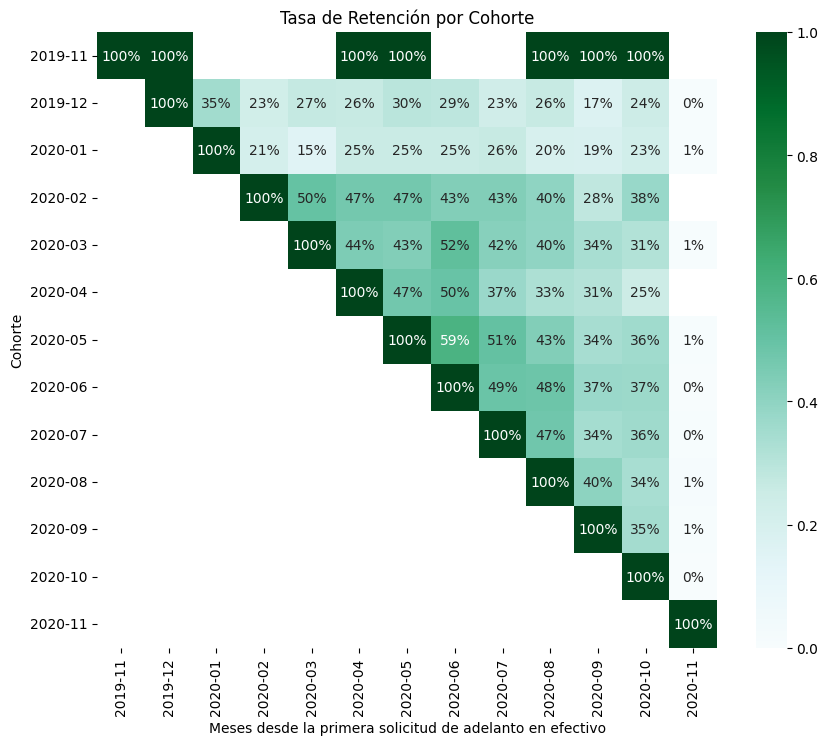

In [13]:
# Graficar la tasa de retención
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención por Cohorte')
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='BuGn')
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()